In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later.
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

In [3]:
for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, -1, -2, -3) # short distance
    # y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [7]:
# 1. linear model 
i = Input(shape = (T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

In [8]:
r = model.fit(X, Y, epochs=100, validation_split=0.5)

Epoch 1/100
79/79 [==============================] - 1s 3ms/step - loss: 0.7738 - accuracy: 0.4984 - val_loss: 0.7000 - val_accuracy: 0.5028
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.4844 - val_loss: 0.6970 - val_accuracy: 0.4868
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5056 - val_loss: 0.6979 - val_accuracy: 0.4864
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5100 - val_loss: 0.6966 - val_accuracy: 0.4820
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5092 - val_loss: 0.6963 - val_accuracy: 0.4864
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5092 - val_loss: 0.6969 - val_accuracy: 0.4872
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5128 - val_loss: 0.6979 - val_accuracy: 0.4916
Epoch 8/100
7

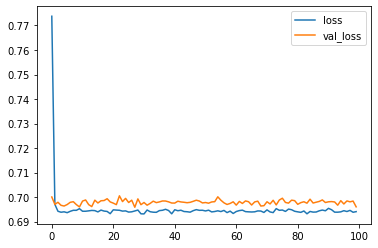

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

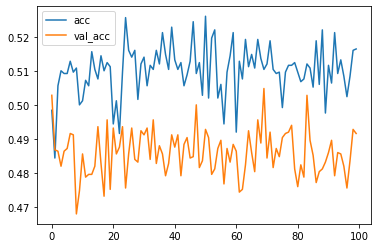

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [11]:
# make a simple RNN
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

In [12]:
r = model.fit(inputs, Y, epochs=200, validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6862 - accuracy: 0.5468 - val_loss: 0.6692 - val_accuracy: 0.5760
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6384 - accuracy: 0.6720 - val_loss: 0.6013 - val_accuracy: 0.7132
Epoch 3/200
79/79 [==============================] - 0s 3ms/step - loss: 0.5481 - accuracy: 0.7860 - val_loss: 0.4804 - val_accuracy: 0.8600
Epoch 4/200
79/79 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.8716 - val_loss: 0.3757 - val_accuracy: 0.8960
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 0.3401 - accuracy: 0.9240 - val_loss: 0.3044 - val_accuracy: 0.9348
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 0.2789 - accuracy: 0.9352 - val_loss: 0.2560 - val_accuracy: 0.9488
Epoch 7/200
79/79 [==============================] - 0s 3ms/step - loss: 0.2363 - accuracy: 0.9564 - val_loss: 0.2191 - val_accuracy: 0.9616
Epoch 8/200
7

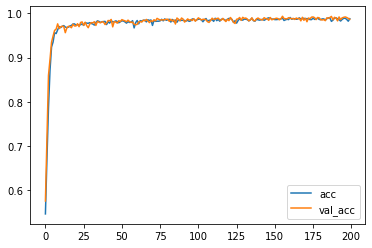

In [13]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [14]:
# Change to the long distance problem
T = 10
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [15]:
# 2. make a simple RNN (long distance)
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
r = model.fit(inputs, Y, epochs=200, validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6975 - accuracy: 0.5196 - val_loss: 0.6971 - val_accuracy: 0.5052
Epoch 2/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5308 - val_loss: 0.6964 - val_accuracy: 0.4972
Epoch 3/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5420 - val_loss: 0.6938 - val_accuracy: 0.5128
Epoch 4/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5300 - val_loss: 0.6961 - val_accuracy: 0.5120
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5428 - val_loss: 0.6949 - val_accuracy: 0.5068
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5632 - val_loss: 0.6990 - val_accuracy: 0.5192
Epoch 7/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5596 - val_loss: 0.6958 - val_accuracy: 0.5144
Epoch 8/200
7

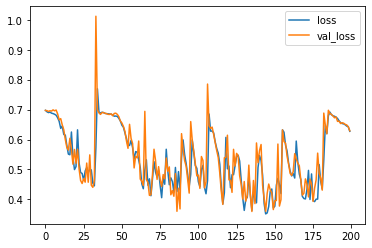

In [16]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

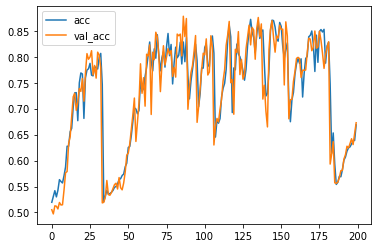

In [17]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [18]:
# 3. make a LSTM (long distance)
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
r = model.fit(inputs, Y, epochs=200, validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 3s 11ms/step - loss: 0.6929 - accuracy: 0.5220 - val_loss: 0.6960 - val_accuracy: 0.4976
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.5192 - val_loss: 0.6958 - val_accuracy: 0.4936
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6915 - accuracy: 0.5292 - val_loss: 0.6952 - val_accuracy: 0.4912
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5284 - val_loss: 0.6969 - val_accuracy: 0.4856
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6908 - accuracy: 0.5324 - val_loss: 0.6955 - val_accuracy: 0.4892
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.5388 - val_loss: 0.6962 - val_accuracy: 0.4888
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.5320 - val_loss: 0.6981 - val_accuracy: 0.4864
Epoch 8/200


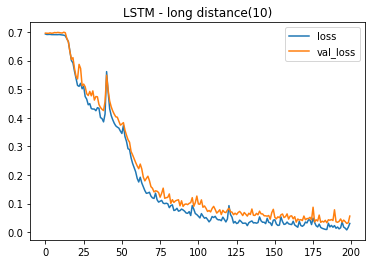

In [19]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('LSTM - long distance(10)')
plt.legend()

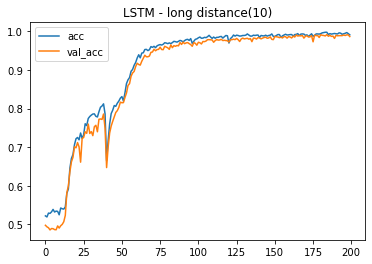

In [20]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title('LSTM - long distance(10)')
plt.legend()
plt.show()

In [21]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [22]:
# 4. make a simple RNN (long distance(20))
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
r = model.fit(inputs, Y, epochs=200, validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.7010 - accuracy: 0.4924 - val_loss: 0.6942 - val_accuracy: 0.5024
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6969 - accuracy: 0.4844 - val_loss: 0.6944 - val_accuracy: 0.5064
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5128 - val_loss: 0.6970 - val_accuracy: 0.4964
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5032 - val_loss: 0.6940 - val_accuracy: 0.4940
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5140 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5016 - val_loss: 0.6945 - val_accuracy: 0.5052
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5192 - val_loss: 0.6943 - val_accuracy: 0.4936
Epoch 8/200
7

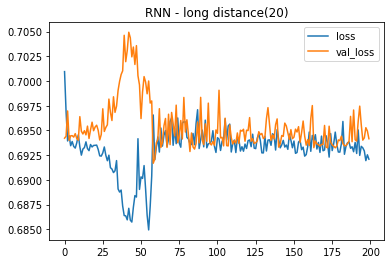

In [23]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('RNN - long distance(20)')
plt.legend()

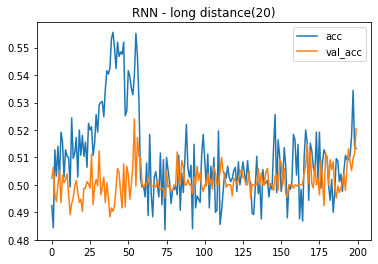

In [24]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title('RNN - long distance(20)')
plt.legend()
plt.show()

In [25]:
# 5. make a LSTM (long distance(20))
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
r = model.fit(inputs, Y, epochs=200, validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 3s 12ms/step - loss: 0.6951 - accuracy: 0.4872 - val_loss: 0.6939 - val_accuracy: 0.4976
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.4964 - val_loss: 0.6932 - val_accuracy: 0.5060
Epoch 3/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.5092 - val_loss: 0.6934 - val_accuracy: 0.4992
Epoch 5/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6937 - accuracy: 0.4912 - val_loss: 0.6935 - val_accuracy: 0.5128
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.4964 - val_loss: 0.6933 - val_accuracy: 0.5024
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6935 - val_accuracy: 0.5064
Epoch 8/200


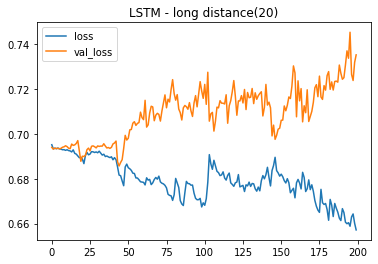

In [26]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('LSTM - long distance(20)')
plt.legend()

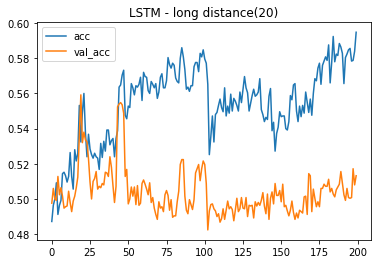

In [27]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title('LSTM - long distance(20)')
plt.legend()
plt.show()

In [28]:
# 6. make a GRU (long distance(20))
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = GRU(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
r = model.fit(inputs, Y, epochs=200, validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 3s 12ms/step - loss: 0.6950 - accuracy: 0.5012 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 2/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6940 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.5116
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6943 - accuracy: 0.4884 - val_loss: 0.6935 - val_accuracy: 0.4920
Epoch 4/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6929 - accuracy: 0.5044 - val_loss: 0.6951 - val_accuracy: 0.4976
Epoch 5/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6934 - accuracy: 0.5096 - val_loss: 0.6933 - val_accuracy: 0.5080
Epoch 6/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6934 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.5096
Epoch 7/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6934 - accuracy: 0.5092 - val_loss: 0.6932 - val_accuracy: 0.4976
Epoch 8/200


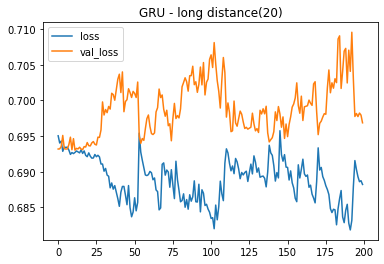

In [29]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('GRU - long distance(20)')
plt.legend()

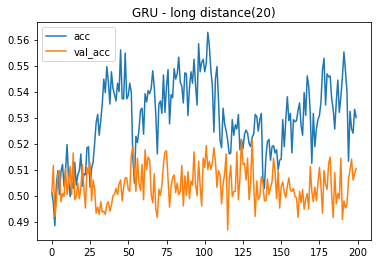

In [30]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title('GRU - long distance(20)')
plt.legend()
plt.show()

In [32]:
# 7. make a LSTM (long distance(20)) + Global Max Pooling
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
r = model.fit(inputs, Y, epochs=200, validation_split=0.5)

Epoch 1/200
79/79 [==============================] - 3s 15ms/step - loss: 0.6948 - accuracy: 0.5084 - val_loss: 0.6937 - val_accuracy: 0.4972
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6937 - accuracy: 0.4944 - val_loss: 0.6933 - val_accuracy: 0.4944
Epoch 3/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6938 - accuracy: 0.4884 - val_loss: 0.6933 - val_accuracy: 0.4844
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.5076 - val_loss: 0.6933 - val_accuracy: 0.4944
Epoch 5/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.5092 - val_loss: 0.6933 - val_accuracy: 0.4972
Epoch 7/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6931 - val_accuracy: 0.5284
Epoch 8/200


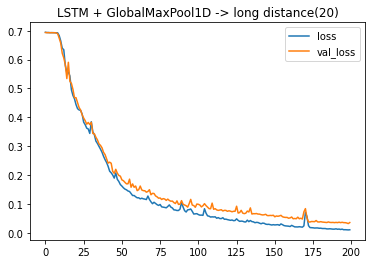

In [33]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('LSTM + GlobalMaxPool1D -> long distance(20)')
plt.legend()

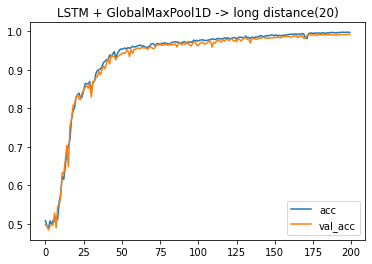

In [34]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title('LSTM + GlobalMaxPool1D -> long distance(20)')
plt.legend()
plt.show()